In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [3]:
keras.__version__

'2.6.0'

In [4]:
classes = ['neutral', 'happy']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = '/content/drive/MyDrive/JPHACKS21'

train_dir = base_dir+'/train'
valid_dir = base_dir+'/valid'
test_dir = base_dir+'/test'

'''
train_neutral_dir = train_dir+'/neutral'
train_happy_dir = train_dir+ '/happy'

valid_neutral_dir = valid_dir+ '/neutral'
valid_happy_dir = valid_dir+ '/happy'

test_neutral_dir = test_dir+ '/neutral'
test_happy_dir = test_dir+ '/happy'
'''

# 平均ぐらいの画像サイズがいいらしい
img_rows, img_cols = 48, 48

In [10]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_rows, img_cols),
                                                    color_mode='rgb',
                                                    classes=classes,
                                                    class_mode='categorical',
                                                    batch_size=256,
                                                    shuffle=True)

Found 58021 images belonging to 2 classes.


train58021

In [11]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_generator = test_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(img_rows, img_cols),
                                                   color_mode='rgb',
                                                   classes=classes,
                                                   class_mode='categorical',
                                                   batch_size=256,
                                                   shuffle=True)

Found 17047 images belonging to 2 classes.


test17047

In [12]:
model=Sequential()
# 畳み込み層
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# 全結合層
model.add(Flatten())
model.add(Dense(512,activation='relu'))
# 出力層
model.add(Dense(nb_classes,activation='softmax'))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 128)        

In [13]:
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer= opt, 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
history = model.fit(train_generator,
                    steps_per_epoch=226,
                    epochs=5,
                    validation_data=valid_generator,
                    validation_steps=66,
                    verbose=1)

Epoch 1/5
226/226 [==============================] - 24979s 111s/step - loss: 0.5998 - acc: 0.6584 - val_loss: 0.6727 - val_acc: 0.6210
Epoch 2/5
226/226 [==============================] - 287s 1s/step - loss: 0.4034 - acc: 0.8171 - val_loss: 0.8085 - val_acc: 0.5891
Epoch 3/5
226/226 [==============================] - 287s 1s/step - loss: 0.3512 - acc: 0.8454 - val_loss: 0.7557 - val_acc: 0.6188
Epoch 4/5
226/226 [==============================] - 290s 1s/step - loss: 0.3325 - acc: 0.8565 - val_loss: 0.6071 - val_acc: 0.6911
Epoch 5/5
226/226 [==============================] - 290s 1s/step - loss: 0.3159 - acc: 0.8644 - val_loss: 0.7014 - val_acc: 0.6577


In [15]:
hdf5_file = os.path.join(base_dir, 'mask-model_cnn.hdf5')
model.save(hdf5_file)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

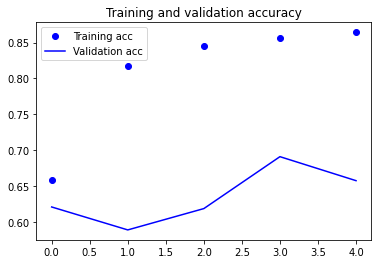

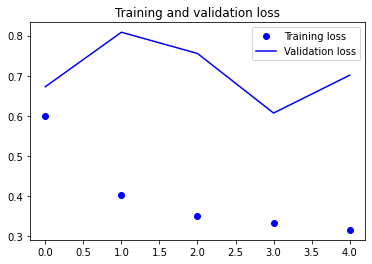

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(img_rows, img_cols),
                                                  color_mode='rgb',
                                                  classes=classes,
                                                  class_mode='categorical',
                                                  batch_size=batch_size_for_data_generator)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 11467 images belonging to 2 classes.
50/50 [==============================] - 352s 7s/step - loss: 0.5707 - acc: 0.7310
test acc: 0.7310000061988831
